In [1]:
!pip install -qqq git+https://github.com/albumentations-team/albumentations.git
!pip install -qqq torchsummary
!pip install -qqq torch-lr-finder

  Preparing metadata (setup.py) ... done


In [2]:
!git clone https://github.com/amitkml/ERA-V1

Cloning into 'ERA-V1'...
remote: Enumerating objects: 287, done.
remote: Counting objects: 100% (261/261), done.
remote: Compressing objects: 100% (209/209), done.
remote: Total 287 (delta 96), reused 205 (delta 45), pack-reused 26
Receiving objects: 100% (287/287), 90.77 MiB | 31.47 MiB/s, done.
Resolving deltas: 100% (97/97), done.
Updating files: 100% (152/152), done.


In [3]:
cd /content/ERA-V1/Session11

/content/ERA-V1/Session11


In [4]:
from utils.helper import seed_everything, get_default_device, calculate_mean_std
seed_everything(1)

In [5]:
mean, std = calculate_mean_std("CIFAR10")
mean, std

100%|██████████| 170498071/170498071 [00:08<00:00, 20010167.40it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


(array([0.49139968, 0.48215841, 0.44653091]),
 array([0.24703223, 0.24348513, 0.26158784]))

In [6]:
from utils.transforms import apply_transforms_custom_resnet
train_transforms, test_transforms = apply_transforms_custom_resnet(mean, std)

In [7]:
from torchvision import datasets

train_dataset = datasets.CIFAR10(root='data/', train=True, download=False, transform=train_transforms)
test_dataset = datasets.CIFAR10(root='data/', train=False, download=False, transform=test_transforms)

In [8]:
from torch.utils.data import DataLoader

train_loader = DataLoader(dataset=train_dataset, batch_size=128, shuffle=True, pin_memory=True, num_workers=2)
test_loader = DataLoader(dataset=test_dataset, batch_size=128, shuffle=False, pin_memory=True, num_workers=2)

In [9]:
labels = train_dataset.classes
labels

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

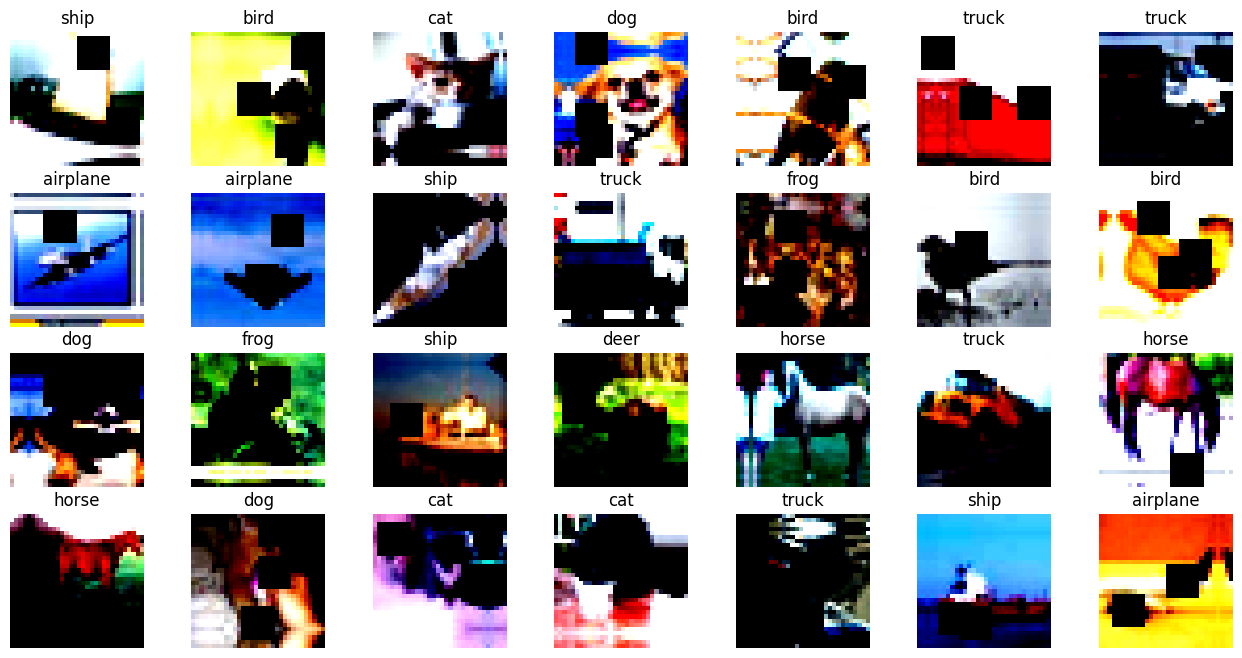

In [10]:
from utils.plot_utils import show_batch

show_batch(train_loader, labels)

In [11]:
device = get_default_device()
device

device(type='cuda')

In [12]:
from models.custom_resnet import CustomResNet
from  models.resnet import ResNet

from utils.helper import model_summary

model = CustomResNet("BN").to(device)
# model = ResNet().to(device) #.to(device)


model_summary(model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [13]:
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim

epochs = 24
lr = 0.001
l1_factor = 0
max_epoch = 5

optimizer = optim.SGD(model.parameters(), lr=lr,momentum=0.9, weight_decay = 0.005)
criterion = nn.CrossEntropyLoss()

/usr/local/lib/python3.10/dist-packages/torch_lr_finder/lr_finder.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


  0%|          | 0/1896 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 3.70E-01


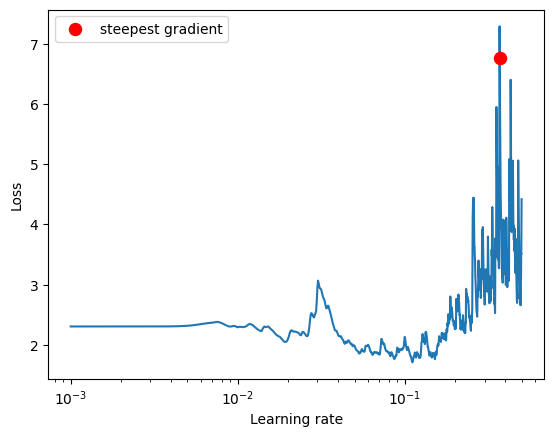

In [14]:
from utils.lr_finder import find_lr

max_lr = find_lr(model, train_loader, test_loader, epochs, optimizer, criterion, device)

In [15]:
max_lr

0.3701810026385224

In [16]:
from main import trainer

train_accuracy, train_losses, test_accuracy, test_losses = trainer(model, epochs, device, train_loader, test_loader, optimizer, criterion, l1_factor, max_lr, max_epoch)

Epoch 1:


Train Loss=1.4405291080474854 Batch_id=390 LR= 0.07723 Train Accuracy= 33.89: 100%|██████████| 391/391 [01:59<00:00,  3.26it/s]



: Average Test loss: 0.0133, Test Accuracy: 3858/10000 (38.58%)

Epoch 2:


Train Loss=1.3430726528167725 Batch_id=390 LR= 0.15828 Train Accuracy= 43.32: 100%|██████████| 391/391 [01:49<00:00,  3.58it/s]



: Average Test loss: 0.0353, Test Accuracy: 1983/10000 (19.83%)

Epoch 3:


Train Loss=1.5983365774154663 Batch_id=390 LR= 0.25842 Train Accuracy= 44.12: 100%|██████████| 391/391 [01:55<00:00,  3.38it/s]



: Average Test loss: 0.0240, Test Accuracy: 1899/10000 (18.99%)

Epoch 4:


Train Loss=1.6557127237319946 Batch_id=390 LR= 0.33937 Train Accuracy= 42.68: 100%|██████████| 391/391 [01:52<00:00,  3.48it/s]



: Average Test loss: 0.0164, Test Accuracy: 2865/10000 (28.65%)

Epoch 5:


Train Loss=1.5967676639556885 Batch_id=390 LR= 0.37018 Train Accuracy= 41.23: 100%|██████████| 391/391 [01:46<00:00,  3.67it/s]



: Average Test loss: 0.0164, Test Accuracy: 2986/10000 (29.86%)

Epoch 6:


Train Loss=1.7119026184082031 Batch_id=390 LR= 0.36764 Train Accuracy= 41.46: 100%|██████████| 391/391 [01:55<00:00,  3.38it/s]



: Average Test loss: 0.0156, Test Accuracy: 3337/10000 (33.37%)

Epoch 7:


Train Loss=1.5947458744049072 Batch_id=390 LR= 0.36013 Train Accuracy= 41.48: 100%|██████████| 391/391 [01:44<00:00,  3.75it/s]



: Average Test loss: 0.0241, Test Accuracy: 1562/10000 (15.62%)

Epoch 8:


Train Loss=1.693007230758667 Batch_id=390 LR= 0.34784 Train Accuracy= 41.18: 100%|██████████| 391/391 [01:52<00:00,  3.46it/s]



: Average Test loss: 0.0149, Test Accuracy: 3661/10000 (36.61%)

Epoch 9:


Train Loss=1.351563811302185 Batch_id=390 LR= 0.33111 Train Accuracy= 42.07: 100%|██████████| 391/391 [01:51<00:00,  3.51it/s]



: Average Test loss: 0.0380, Test Accuracy: 2068/10000 (20.68%)

Epoch 10:


Train Loss=1.6115176677703857 Batch_id=390 LR= 0.31039 Train Accuracy= 41.96: 100%|██████████| 391/391 [01:57<00:00,  3.32it/s]



: Average Test loss: 0.0160, Test Accuracy: 3063/10000 (30.63%)

Epoch 11:


Train Loss=1.8349758386611938 Batch_id=390 LR= 0.28626 Train Accuracy= 42.06: 100%|██████████| 391/391 [01:39<00:00,  3.95it/s]



: Average Test loss: 0.0151, Test Accuracy: 3245/10000 (32.45%)

Epoch 12:


Train Loss=1.541418433189392 Batch_id=390 LR= 0.25937 Train Accuracy= 42.33: 100%|██████████| 391/391 [01:53<00:00,  3.46it/s]



: Average Test loss: 0.0170, Test Accuracy: 3250/10000 (32.50%)

Epoch 13:


Train Loss=1.4480793476104736 Batch_id=390 LR= 0.23045 Train Accuracy= 42.92: 100%|██████████| 391/391 [01:47<00:00,  3.65it/s]



: Average Test loss: 0.0337, Test Accuracy: 2190/10000 (21.90%)

Epoch 14:


Train Loss=1.5729821920394897 Batch_id=390 LR= 0.20030 Train Accuracy= 43.26: 100%|██████████| 391/391 [01:51<00:00,  3.49it/s]



: Average Test loss: 0.0335, Test Accuracy: 1543/10000 (15.43%)

Epoch 15:


Train Loss=1.5440442562103271 Batch_id=390 LR= 0.16973 Train Accuracy= 44.59: 100%|██████████| 391/391 [01:44<00:00,  3.75it/s]



: Average Test loss: 0.0238, Test Accuracy: 2134/10000 (21.34%)

Epoch 16:


Train Loss=1.2687945365905762 Batch_id=390 LR= 0.13958 Train Accuracy= 45.62: 100%|██████████| 391/391 [01:58<00:00,  3.31it/s]



: Average Test loss: 0.0322, Test Accuracy: 2330/10000 (23.30%)

Epoch 17:


Train Loss=1.4898033142089844 Batch_id=390 LR= 0.11067 Train Accuracy= 46.85: 100%|██████████| 391/391 [01:45<00:00,  3.70it/s]



: Average Test loss: 0.0141, Test Accuracy: 3899/10000 (38.99%)

Epoch 18:


Train Loss=1.227722406387329 Batch_id=390 LR= 0.08379 Train Accuracy= 49.20: 100%|██████████| 391/391 [01:41<00:00,  3.84it/s]



: Average Test loss: 0.0113, Test Accuracy: 4885/10000 (48.85%)

Epoch 19:


Train Loss=1.3949377536773682 Batch_id=390 LR= 0.05968 Train Accuracy= 50.78: 100%|██████████| 391/391 [01:44<00:00,  3.73it/s]



: Average Test loss: 0.0146, Test Accuracy: 4397/10000 (43.97%)

Epoch 20:


Train Loss=1.423964023590088 Batch_id=390 LR= 0.03898 Train Accuracy= 53.30: 100%|██████████| 391/391 [01:47<00:00,  3.64it/s]



: Average Test loss: 0.0147, Test Accuracy: 4239/10000 (42.39%)

Epoch 21:


Train Loss=0.966474711894989 Batch_id=390 LR= 0.02228 Train Accuracy= 56.68: 100%|██████████| 391/391 [01:41<00:00,  3.84it/s]



: Average Test loss: 0.0118, Test Accuracy: 4625/10000 (46.25%)

Epoch 22:


Train Loss=0.9926832318305969 Batch_id=390 LR= 0.01001 Train Accuracy= 61.63: 100%|██████████| 391/391 [01:47<00:00,  3.65it/s]



: Average Test loss: 0.0083, Test Accuracy: 6289/10000 (62.89%)

Epoch 23:


Train Loss=0.8653895258903503 Batch_id=390 LR= 0.00252 Train Accuracy= 67.61: 100%|██████████| 391/391 [01:44<00:00,  3.73it/s]



: Average Test loss: 0.0059, Test Accuracy: 7332/10000 (73.32%)

Epoch 24:


Train Loss=0.7106490135192871 Batch_id=390 LR= 0.00000 Train Accuracy= 72.86: 100%|██████████| 391/391 [01:43<00:00,  3.77it/s]



: Average Test loss: 0.0051, Test Accuracy: 7759/10000 (77.59%)



Total wrong predictions are 2241


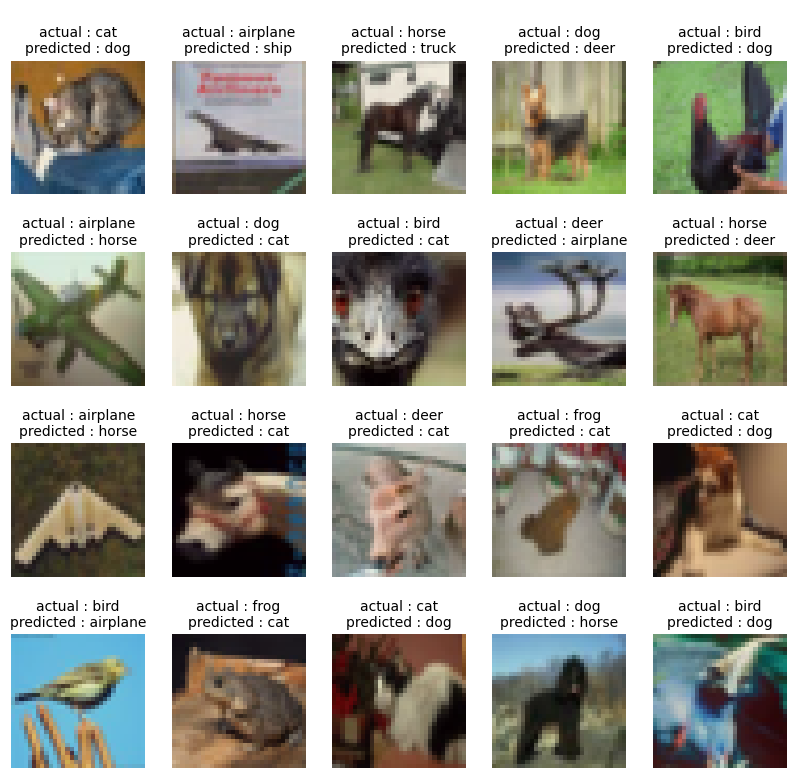

In [17]:
from utils.plot_utils import misclassified_images

images_misclassified = misclassified_images(model, test_loader, device)

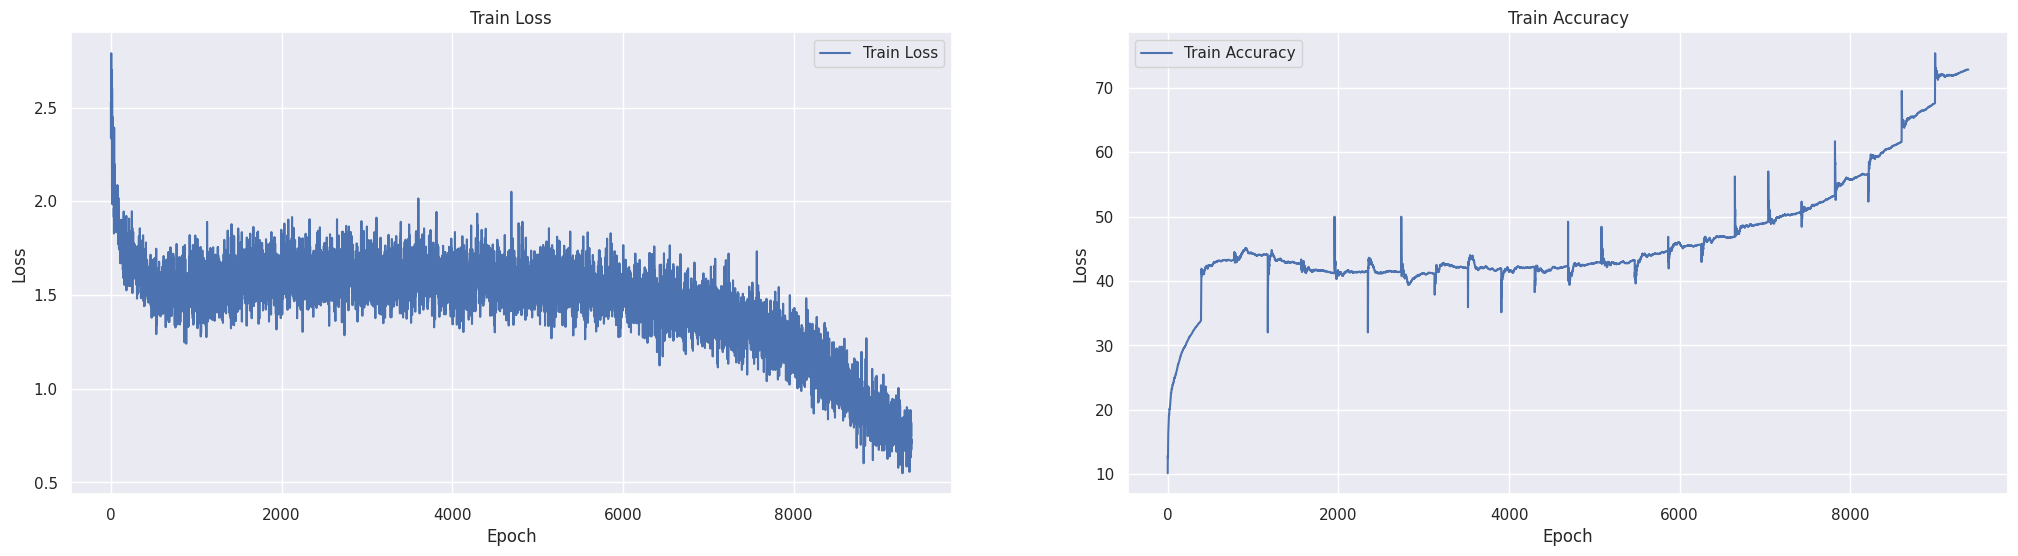

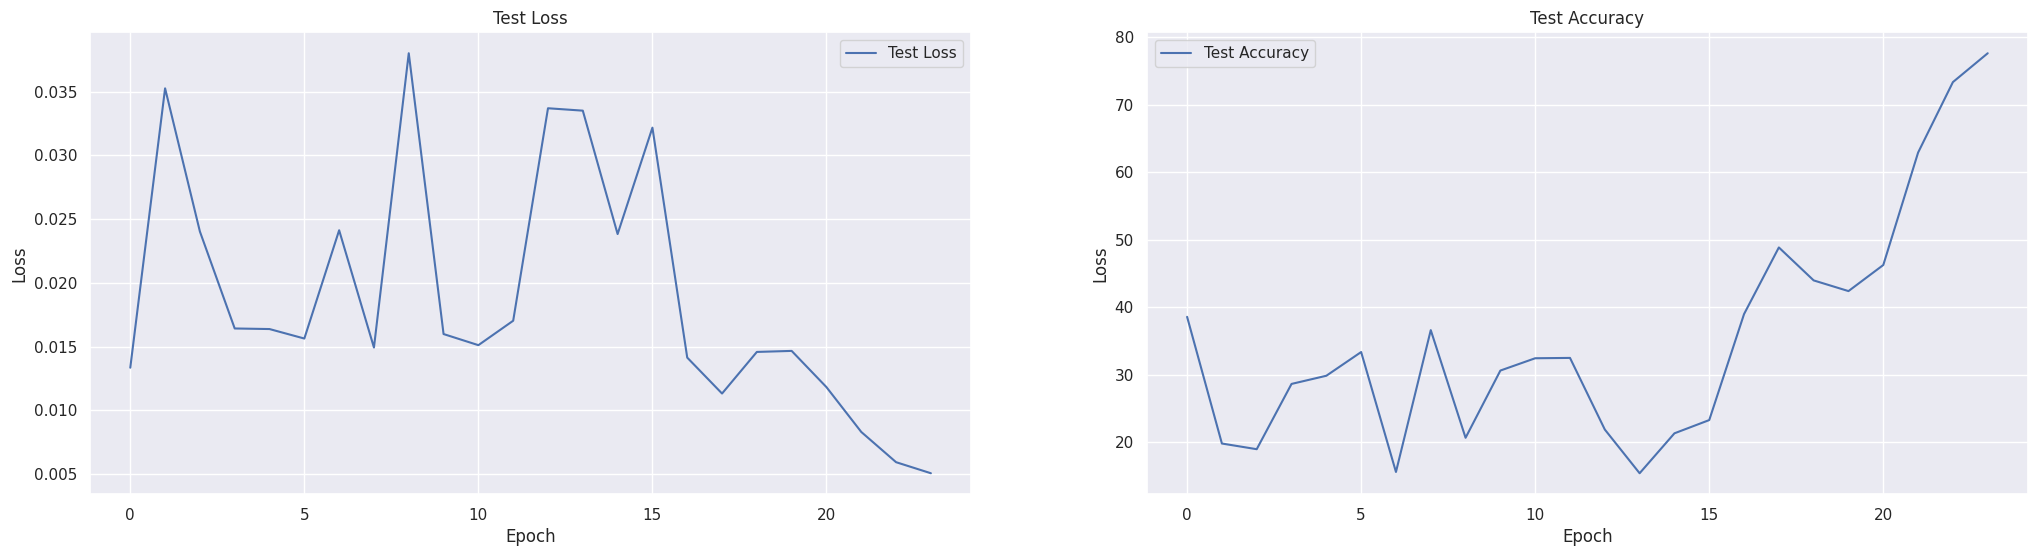

In [18]:
from utils.plot_utils import plot_metrics

plot_metrics((train_accuracy, train_losses, test_accuracy, test_losses))

In [19]:
from utils.helper import class_level_accuracy

class_level_accuracy(model, test_loader, device, labels)

Accuracy of airplane : 80 %
Accuracy of automobile : 92 %
Accuracy of  bird : 61 %
Accuracy of   cat : 59 %
Accuracy of  deer : 70 %
Accuracy of   dog : 67 %
Accuracy of  frog : 86 %
Accuracy of horse : 80 %
Accuracy of  ship : 88 %
Accuracy of truck : 87 %


In [20]:
from utils.grad_cam import generate_gradcam, plot_gradcam

target_layers = ["Conv2d-1", "Conv2d-2", "Conv2d-3"]
gradcam_output, probs, predicted_classes = generate_gradcam(images_misclassified[:10], model, target_layers, device)
plot_gradcam(gradcam_output, target_layers, labels, (3, 32, 32), predicted_classes, images_misclassified[:10])

Generating Grad-CAM for conv_layer_1


ValueError: ignored